## Loading the dataset
**Here I'm using mnist original dataset**

In [3]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from keras.datasets import mnist                                                                 # Importing mnist Dataset
from keras.callbacks import ReduceLROnPlateau
from keras.utils import to_categorical                                                           # Importing tool that will be used for One Hot Encoding 

from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

from sklearn.preprocessing import LabelBinarizer                                                 # Importing Labelbinarizer. it works similar to onehotencoder

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### Load MNIST Dataset from Keras

In [4]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

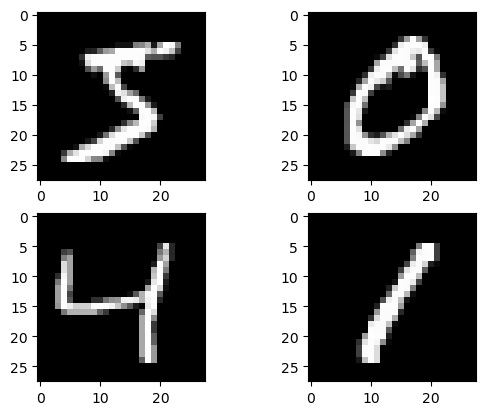

In [5]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [6]:
# View shape of the dataset
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Visualization

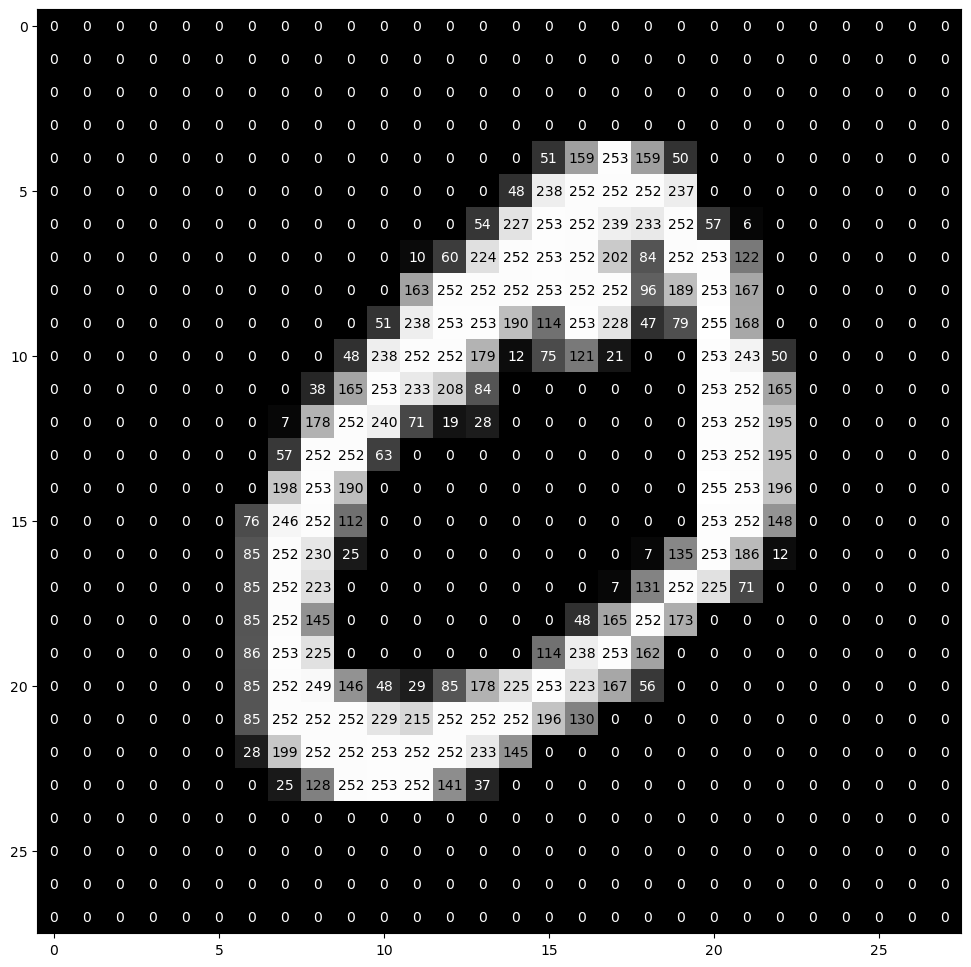

In [7]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[1].reshape(28,28), ax)

In [8]:
def plot_images(images):
  num_classes=10                                                                  # Number of Classes

  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, 10)                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
  plt.show()

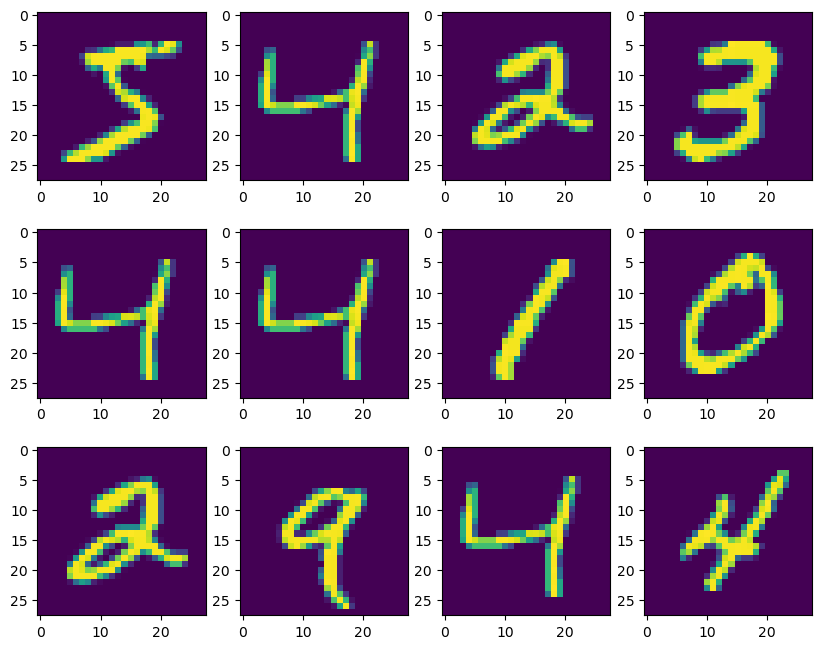

In [9]:
plot_images(X_train)

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

<Axes: ylabel='count'>

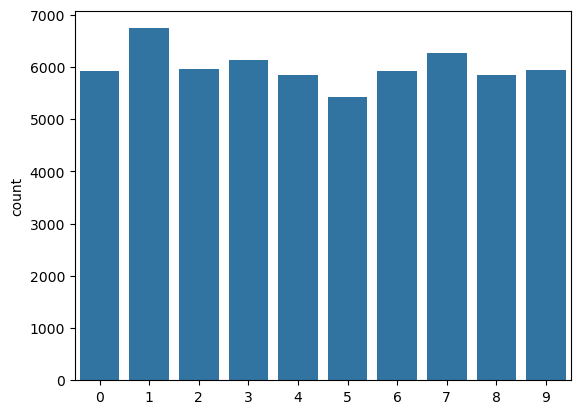

In [11]:
sns.countplot(x=y_train.tolist())
# plt.xticks(rotation='vertical')

## Data PreProcessing

In [12]:

print(f'xtrain_shp:  {X_train.shape}')
print(f'xtrain_shp1: {X_train.shape[1]}')
print(f'xtrain_shp2: {X_train.shape[2]}')

print('-' * 50)
# reshape to be [samples][width][height][channels]
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train_flat = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test_flat = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

print(f'num_pixel: {num_pixels}')
print('-' * 50)
print(f'reshape: {X_train_flat}, new_shape: {X_train_flat.shape}')
print('-' * 50)
print(f'reshape: {X_test_flat} new_shape: {X_test_flat.shape}')

xtrain_shp:  (60000, 28, 28)
xtrain_shp1: 28
xtrain_shp2: 28
--------------------------------------------------
num_pixel: 784
--------------------------------------------------
reshape: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], new_shape: (60000, 784)
--------------------------------------------------
reshape: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] new_shape: (10000, 784)


## Normalize

In [13]:
# Normalizing the image pixels
X_train_flat_norm = X_train_flat.astype('float32')/255.0
X_test_flat_norm = X_test_flat.astype('float32')/255.0

In [14]:
print(X_train_flat_norm)
print(X_train_flat_norm.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(60000, 784)


## One Hot Encode

In [15]:
#Encoding the target variable

print(f'ytrain: {y_train.shape}')
print(f'ytest: {y_test.shape}')

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f'ytrainCat: {y_train.shape}')
print(f'ytestCat: {y_test.shape}')


ytrain: (60000,)
ytest: (10000,)
ytrainCat: (60000, 10)
ytestCat: (10000, 10)


In [16]:
num_classes = y_test.shape[1]
num_classes

10

## Model Building

## Model 1

In [17]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [18]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [19]:
# define baseline model
def base_model():
	# create model1
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [20]:
# build the model
model = base_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 623,290 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Fit the model
model.fit(X_train_flat_norm, y_train, validation_data=(X_test_flat_norm, y_test), epochs=10, batch_size=150, verbose=2)
# Final evaluation of the model
accuracy = model.evaluate(X_test_flat_norm, y_test, verbose=0)
print(f'Base model Error: {round(100-accuracy[1]*100,2)}%')

Epoch 1/10
400/400 - 6s - 14ms/step - accuracy: 0.9273 - loss: 0.2548 - val_accuracy: 0.9644 - val_loss: 0.1232
Epoch 2/10
400/400 - 4s - 11ms/step - accuracy: 0.9711 - loss: 0.1003 - val_accuracy: 0.9729 - val_loss: 0.0864
Epoch 3/10
400/400 - 4s - 11ms/step - accuracy: 0.9821 - loss: 0.0627 - val_accuracy: 0.9752 - val_loss: 0.0745
Epoch 4/10
400/400 - 4s - 10ms/step - accuracy: 0.9887 - loss: 0.0422 - val_accuracy: 0.9766 - val_loss: 0.0696
Epoch 5/10
400/400 - 4s - 11ms/step - accuracy: 0.9933 - loss: 0.0289 - val_accuracy: 0.9768 - val_loss: 0.0688
Epoch 6/10
400/400 - 4s - 10ms/step - accuracy: 0.9957 - loss: 0.0203 - val_accuracy: 0.9769 - val_loss: 0.0713
Epoch 7/10
400/400 - 4s - 11ms/step - accuracy: 0.9973 - loss: 0.0146 - val_accuracy: 0.9767 - val_loss: 0.0727
Epoch 8/10
400/400 - 4s - 10ms/step - accuracy: 0.9983 - loss: 0.0110 - val_accuracy: 0.9784 - val_loss: 0.0703
Epoch 9/10
400/400 - 5s - 13ms/step - accuracy: 0.9985 - loss: 0.0091 - val_accuracy: 0.9774 - val_loss:

In [22]:
accuracy = model.evaluate(X_test_flat_norm, y_test, verbose=2)
print(f'Base model Error: {round(100-accuracy[1]*100,2)}%')

313/313 - 1s - 2ms/step - accuracy: 0.9769 - loss: 0.0771
Base model Error: 2.31%


## Model 2

In [23]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [24]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [25]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [26]:
print(f'xtrain_shp:  {X_train.shape}')
print(f'ytrain_shp:  {y_train.shape}')

print('-' * 50)

print(f'xtest_shp:  {X_test.shape}')
print(f'ytest_shp:  {y_test.shape}')

xtrain_shp:  (60000, 28, 28)
ytrain_shp:  (60000,)
--------------------------------------------------
xtest_shp:  (10000, 28, 28)
ytest_shp:  (10000,)


In [27]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [28]:
# # Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

In [29]:
print(f'xtrain:  {X_train.shape}')
print(f'xtest:  {X_test.shape}')
print('-' * 50)

print(f'X_train_normalized:  {X_train_normalized.shape}')
print(f'X_test_normalized:  {X_test_normalized.shape}')

xtrain:  (60000, 28, 28, 1)
xtest:  (10000, 28, 28, 1)
--------------------------------------------------
X_train_normalized:  (60000, 28, 28, 1)
X_test_normalized:  (10000, 28, 28, 1)


In [30]:

print(f'y_train:  {X_train.shape}')
print(f'y_test:  {X_test.shape}')

enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_test_encoded=enc.transform(y_test)

print(f'y_train_encoded:  {y_train_encoded.shape}')
print(f'y_test_encoded:  {y_test_encoded.shape}')

y_train:  (60000, 28, 28, 1)
y_test:  (10000, 28, 28, 1)
y_train_encoded:  (60000, 10)
y_test_encoded:  (10000, 10)


In [31]:
# define the larger model
def Larger_model():

    # Intializing a sequential model
    model2 = Sequential()

    # Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
    # Input_shape denotes input image dimension of images
    model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(28, 28, 1)))

    # Adding max pooling to reduce the size of output of first conv layer
    model2.add(MaxPooling2D((2, 2), padding = 'same'))

    # Creating one convolution and max-pooling layers
    model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
    model2.add(MaxPooling2D((2, 2), padding = 'same'))

    # flattening the output of the conv layer after max pooling to make it ready for creating dense connections
    model2.add(Flatten())

    # Adding a fully connected dense layer 
    model2.add(Dense(16, activation='relu'))
    model2.add(Dropout(0.3))

    # Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
    model2.add(Dense(10, activation='softmax'))

    opt=Adam()
    # Compile model
    model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model2

# build the model
model2 = Larger_model()
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │        25,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,378 (173.35 KB)

 Trainable params: 44,378 (173.35 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history2 = model2.fit(
            X_train_normalized, y_train_encoded,
            epochs=22,
            validation_data=(X_test_normalized,y_test_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/22
1875/1875 - 27s - 14ms/step - accuracy: 0.7656 - loss: 0.6273 - val_accuracy: 0.9712 - val_loss: 0.1140
Epoch 2/22
1875/1875 - 24s - 13ms/step - accuracy: 0.8565 - loss: 0.3915 - val_accuracy: 0.9763 - val_loss: 0.0819
Epoch 3/22
1875/1875 - 23s - 12ms/step - accuracy: 0.8781 - loss: 0.3327 - val_accuracy: 0.9836 - val_loss: 0.0565
Epoch 4/22
1875/1875 - 23s - 12ms/step - accuracy: 0.8875 - loss: 0.3086 - val_accuracy: 0.9846 - val_loss: 0.0528
Epoch 5/22
1875/1875 - 24s - 13ms/step - accuracy: 0.8919 - loss: 0.2968 - val_accuracy: 0.9837 - val_loss: 0.0514
Epoch 6/22
1875/1875 - 23s - 12ms/step - accuracy: 0.8982 - loss: 0.2854 - val_accuracy: 0.9864 - val_loss: 0.0467
Epoch 7/22
1875/1875 - 22s - 12ms/step - accuracy: 0.9064 - loss: 0.2687 - val_accuracy: 0.9860 - val_loss: 0.0509
Epoch 8/22
1875/1875 - 23s - 12ms/step - accuracy: 0.9083 - loss: 0.2627 - val_accuracy: 0.9862 - val_loss: 0.0508
Epoch 9/22
1875/1875 - 23s - 12ms/step - accuracy: 0.9117 - loss: 0.2517 - val_a

#### Model evaluation

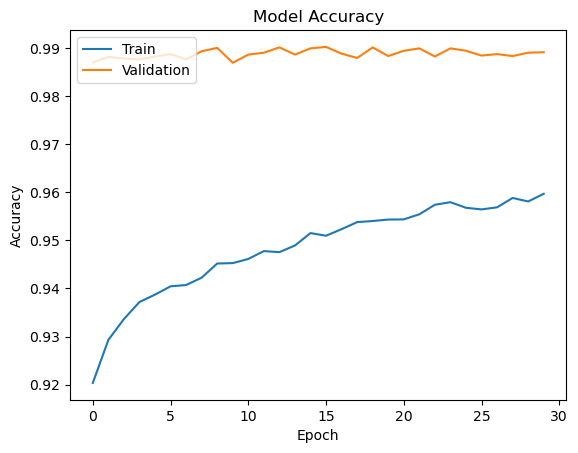

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)
print(f'Model2 Error: {round(100-accuracy[1]*100,2)}%')

313/313 - 2s - 5ms/step - accuracy: 0.9892 - loss: 0.0550
Base model Error: 1.08%


In [ ]:
# Here we would get the output as probablities for each category
y_pred=model2.predict(X_test_normalized)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


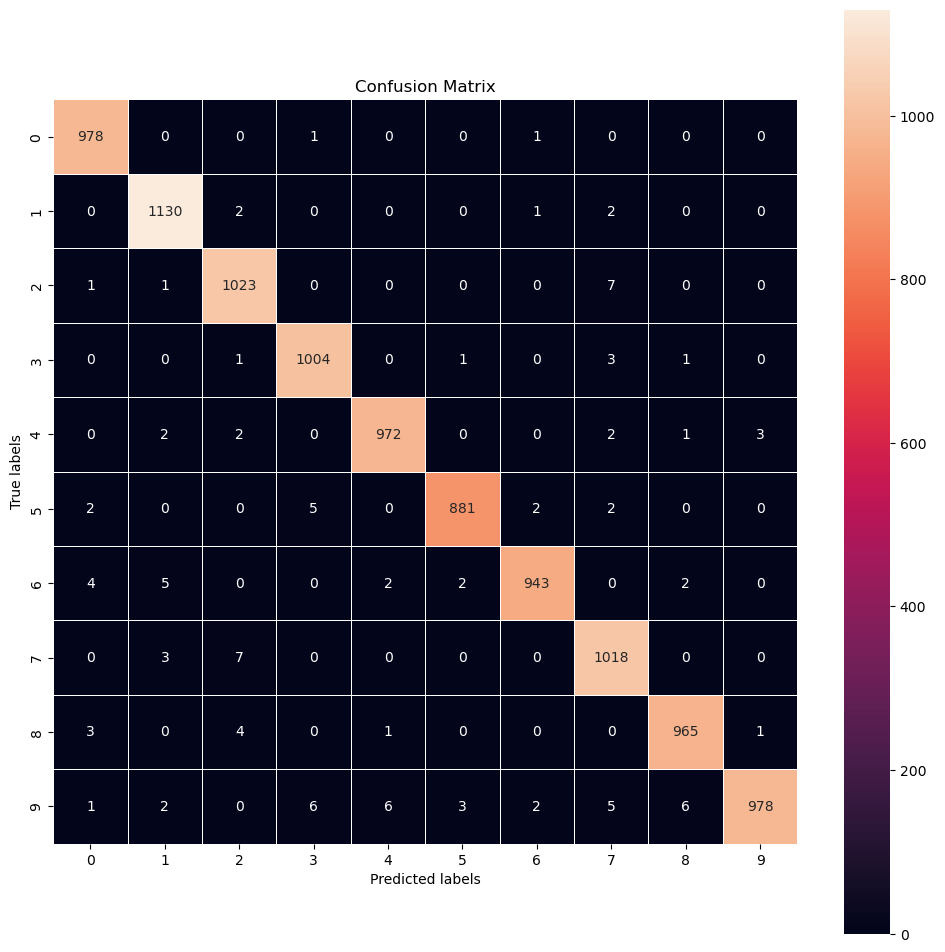

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

plt.show()

In [ ]:
from sklearn import metrics
#Accuracy as per the classification report
cr=metrics.classification_report(y_test_arg,y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## MODEL 3 - Tuned model


In [154]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [155]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [156]:
# define the larger model
def tuned_model():

    # Intializing a sequential model
    model3 = Sequential()

    # Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
    # Input_shape denotes input image dimension of images
    model3.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding="same", input_shape=(28, 28, 1)))
    model3.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
    
    model3.add(Conv2D(128, kernel_size=3, activation='relu', padding="same"))    # Adding max pooling to reduce the size of output of first conv layer
    model3.add(MaxPooling2D(pool_size=2))

    model3.add(Dropout(0.1))
    # Creating one convolution and max-pooling layers
    model3.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
    model3.add(Conv2D(filters=192, kernel_size=3, padding='same', activation='relu'))
    model3.add(MaxPooling2D(pool_size=2))
    model3.add(Dropout(0.1))
    
    
    model3.add(Conv2D(192, kernel_size=5, padding='same', activation='relu'))
    model3.add(MaxPooling2D(pool_size=2, padding='same'))

    # flattening the output of the conv layer after max pooling to make it ready for creating dense connections
    model3.add(Flatten())

    # Adding a fully connected dense layer 
    model3.add(Dense(256, activation='relu'))

    # Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
    model3.add(Dense(10, activation='softmax'))

    
    opt=Adam()
    # Compile model
    model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model3

# build the model
model3 = tuned_model()
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 192)    │       221,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 192)      │       921,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,191,434 (8.36 MB)

 Trainable params: 2,191,434 (8.36 MB)

 Non-trainable params: 0 (0.00 B)

In [157]:
history3 = model3.fit(
            X_train_normalized, y_train_encoded,
            epochs=10,
            validation_data=(X_test_normalized,y_test_encoded),
            batch_size=100,
            verbose=2
)

Epoch 1/10
600/600 - 259s - 431ms/step - accuracy: 0.9564 - loss: 0.1421 - val_accuracy: 0.9884 - val_loss: 0.0349
Epoch 2/10
600/600 - 344s - 574ms/step - accuracy: 0.9896 - loss: 0.0349 - val_accuracy: 0.9839 - val_loss: 0.0514
Epoch 3/10
600/600 - 547s - 912ms/step - accuracy: 0.9916 - loss: 0.0267 - val_accuracy: 0.9906 - val_loss: 0.0304
Epoch 4/10
600/600 - 550s - 917ms/step - accuracy: 0.9940 - loss: 0.0196 - val_accuracy: 0.9888 - val_loss: 0.0373
Epoch 5/10
600/600 - 551s - 919ms/step - accuracy: 0.9951 - loss: 0.0164 - val_accuracy: 0.9891 - val_loss: 0.0352
Epoch 6/10
600/600 - 444s - 740ms/step - accuracy: 0.9951 - loss: 0.0156 - val_accuracy: 0.9887 - val_loss: 0.0387
Epoch 7/10
600/600 - 1980s - 3s/step - accuracy: 0.9965 - loss: 0.0111 - val_accuracy: 0.9929 - val_loss: 0.0241
Epoch 8/10
600/600 - 2095s - 3s/step - accuracy: 0.9967 - loss: 0.0107 - val_accuracy: 0.9900 - val_loss: 0.0423
Epoch 9/10
600/600 - 546s - 910ms/step - accuracy: 0.9970 - loss: 0.0096 - val_accur

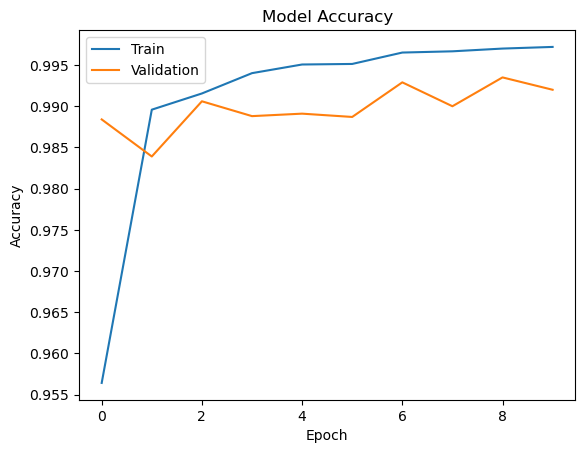

In [158]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [159]:

accuracy = model3.evaluate(X_test_normalized, y_test_encoded, verbose=2)
print(f'tuned model Error: {round(100-accuracy[1]*100,2)}%')

313/313 - 36s - 115ms/step - accuracy: 0.9920 - loss: 0.0315
tuned model Error: 0.8%


In [160]:
# Here we would get the output as probablities for each category
y_pred=model3.predict(X_test_normalized)

313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step


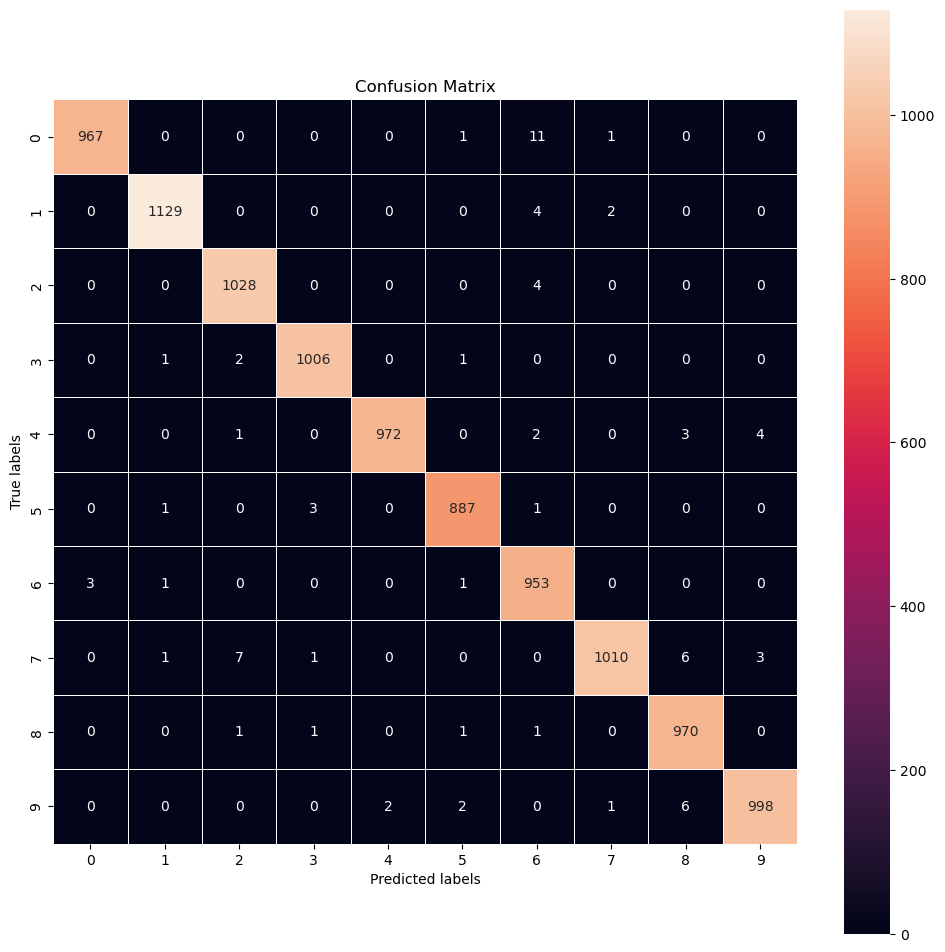

In [161]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

plt.show()

## Choosing final Model
After trying out several models, we observe that the Tuned Model 3 have the best accuracy. Training convolutional neural networks is a random process. This makes experiments difficult because each time you run the same experiment, you get different results. Therefore, you must run your experiments dozens of times and take an average.